# 실습 1. 도함수 plot

In [2]:
import numpy as np
import matplotlib.pyplot as plt

DELTA_X = 1e-5

def derivative(f, a, h=DELTA_X):
    # 함수를 완성하시오
    return (f(a + h) - f(a)) / h

def show_first_derivative(f, interval) :
    plt.figure(figsize=(12, 10), dpi=150)
    x = np.linspace(*interval, 10000)
    y = f(x)

    # plot the origin function
    plt.subplot(3, 1, 1)
    plt.plot(x, y, label='Function', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('origin Function')
    plt.axhline(0, color='gray', linestyle='dashed')
    plt.axvline(0, color='gray', linestyle='dashed')
    plt.legend()

    # plot the first derivative of function (plot code를 완성하시오)
    plt.subplot(3, 1, 2)
    y_prime = derivative(f, x)
    plt.plot(x, y_prime, label='First Derivative', linewidth=2, color="orange", )
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('First Derivative of Function')
    plt.axhline(0, color='gray', linestyle='dashed')
    plt.axvline(0, color='gray', linestyle='dashed')
    plt.legend(loc='lower right')


    # Show the plots
    plt.tight_layout()
    plt.show()

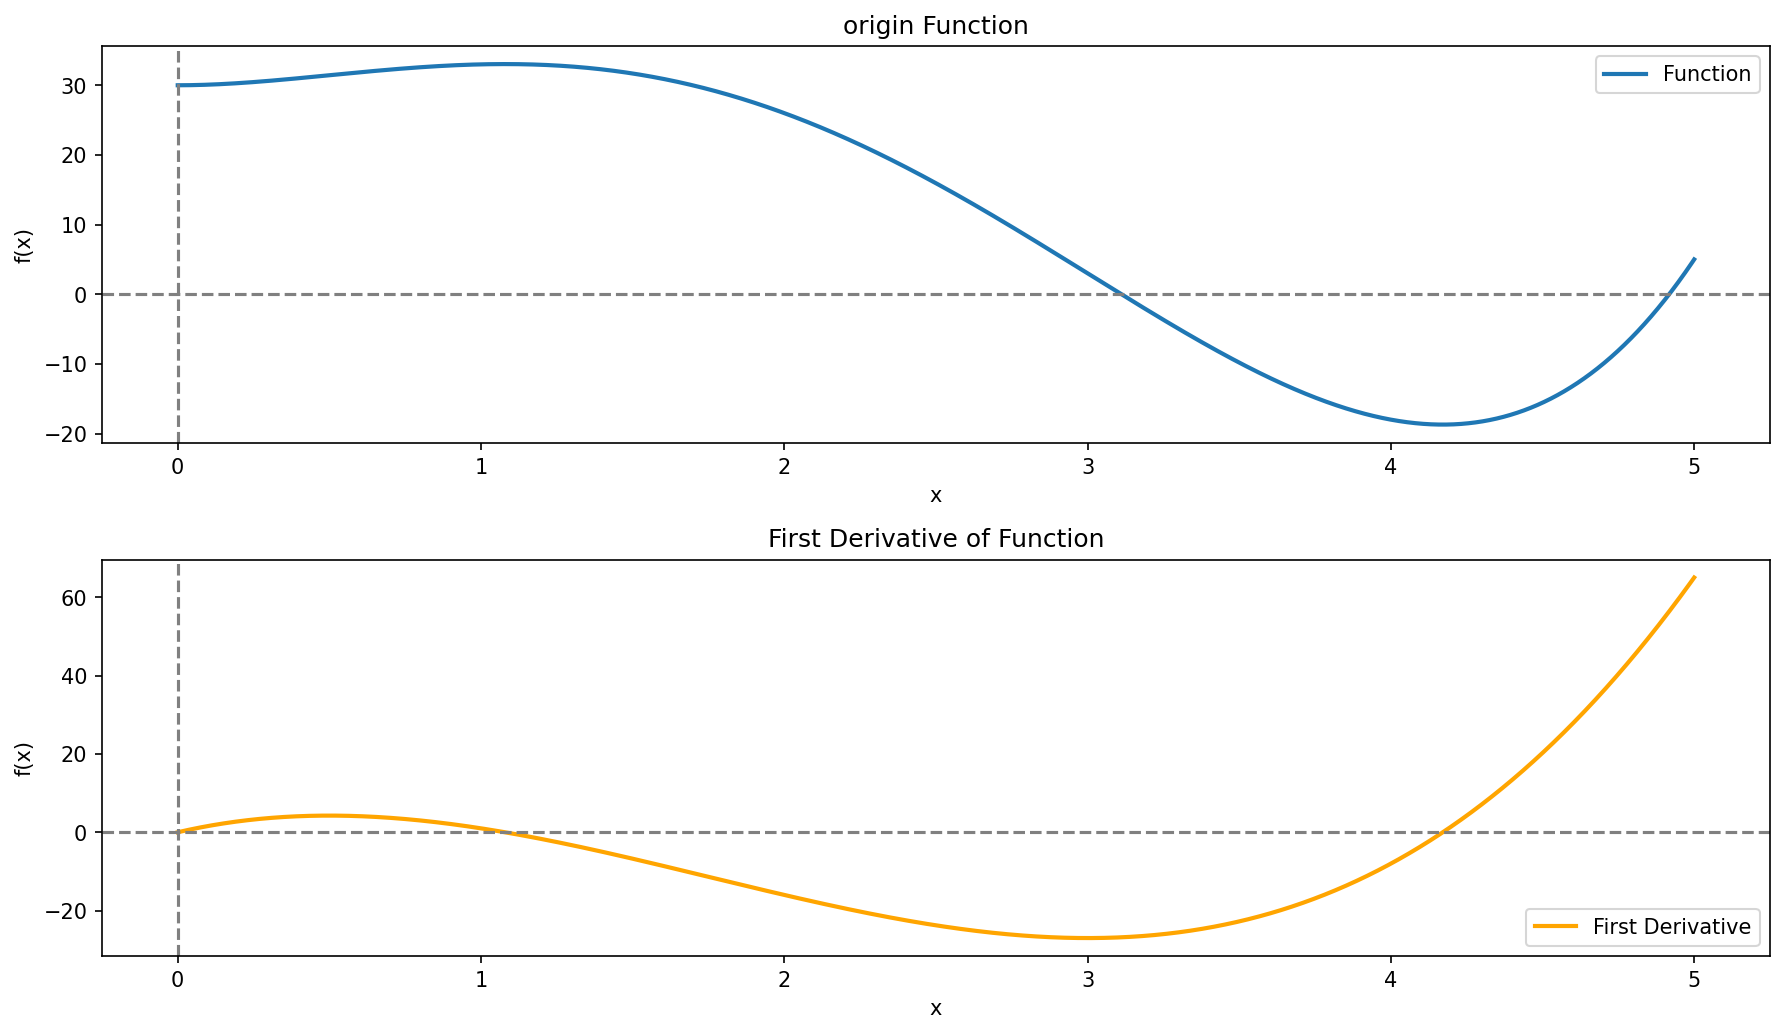

In [3]:
def func(x):
    return x**4 - 7*x**3 + 9*x**2 + 30

show_first_derivative(f=func, interval=(0, 5)) # 수정 x

# 실습 2. 접선 그리기

In [4]:
import numpy as np
import matplotlib.pyplot as plt


DELTA_X = 1e-5

def derivative(f, a, h=DELTA_X):
    # 실습 1에서 사용한 derivative 활용
    return (f(a + h) - f(a)) / h


def show_derivate(f,x,interval, history_x=None, history_y=None):
    # 점의 x좌표 기억
    a = x

    plt.figure(figsize=(10, 7), dpi=100)
    x = np.linspace(*interval, 10000)
    y = f(x)

    plt.plot(x, y, linewidth=2, color='blue')
    plt.grid(True)

    # 점
    plt.scatter(history_x, history_y, color='green', s=60)  # 심화문제
    plt.scatter(a, f(a), color='red', s=100)

    # 접선
    interval = (interval[0] - interval[1]) / 10
    x = np.linspace(*(a - interval, a + interval), 10000)
    y = derivative(f, a) * (x - a) + f(a)
    plt.plot(x, y, linewidth=2, color='green', linestyle='dashed')


    # Show the plots
    plt.tight_layout()
    plt.show()

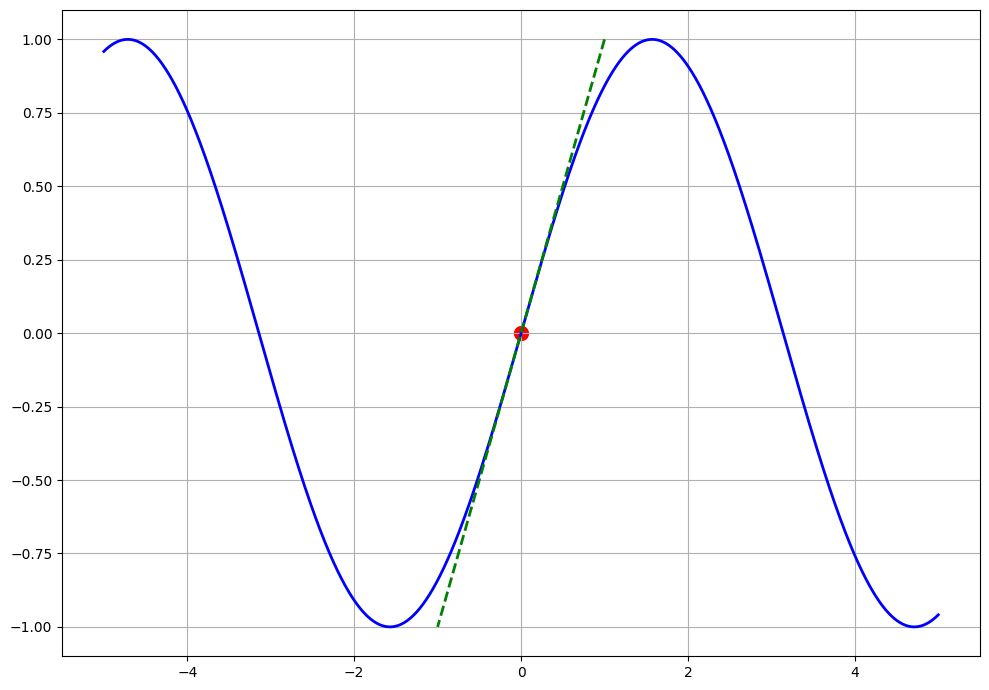

In [5]:
def func(x):
    return np.sin(x)
    # return x**4 - 7*x**3 + 9*x**2 + 30

show_derivate(f=func, x=0, interval=(-5,5)) # 수정 x

# 실습 3. optimization

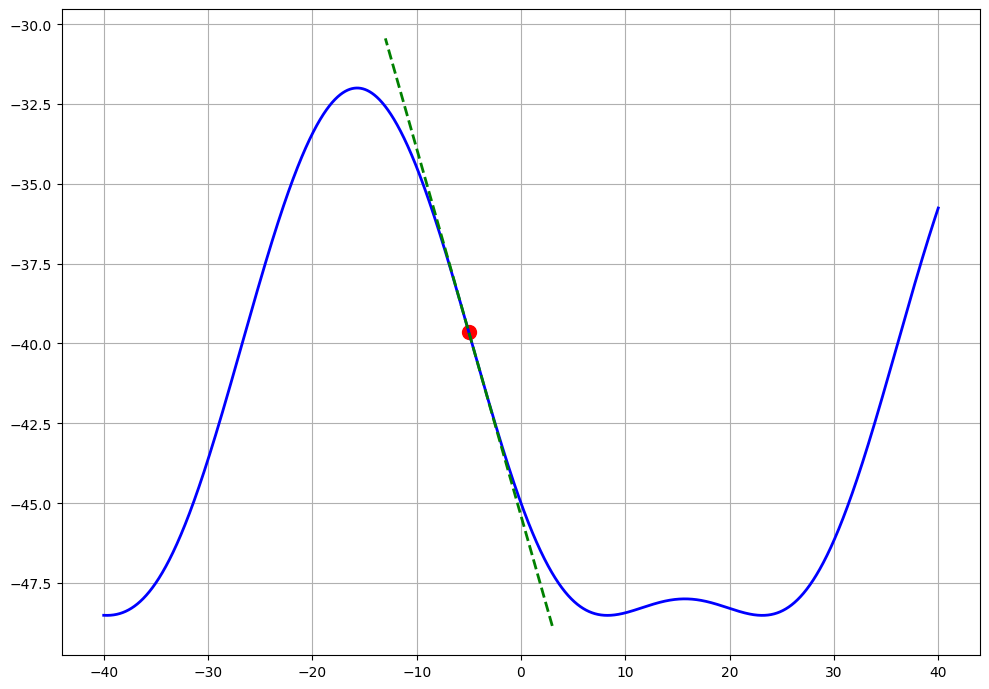

In [6]:
def tire_performance(t):
    tmp = np.e**np.log(np.sin(t / 10) + 3)
    return (tmp**2 - 4 * tmp - 12) * tmp

# 실습 2에서 구현한 show_derivate 함수를 사용 (수정 x)
show_derivate(tire_performance, -5, (-40, 40))

[best_x] :  -15.707967824785669
[best_performance] :  -32.00000000000166


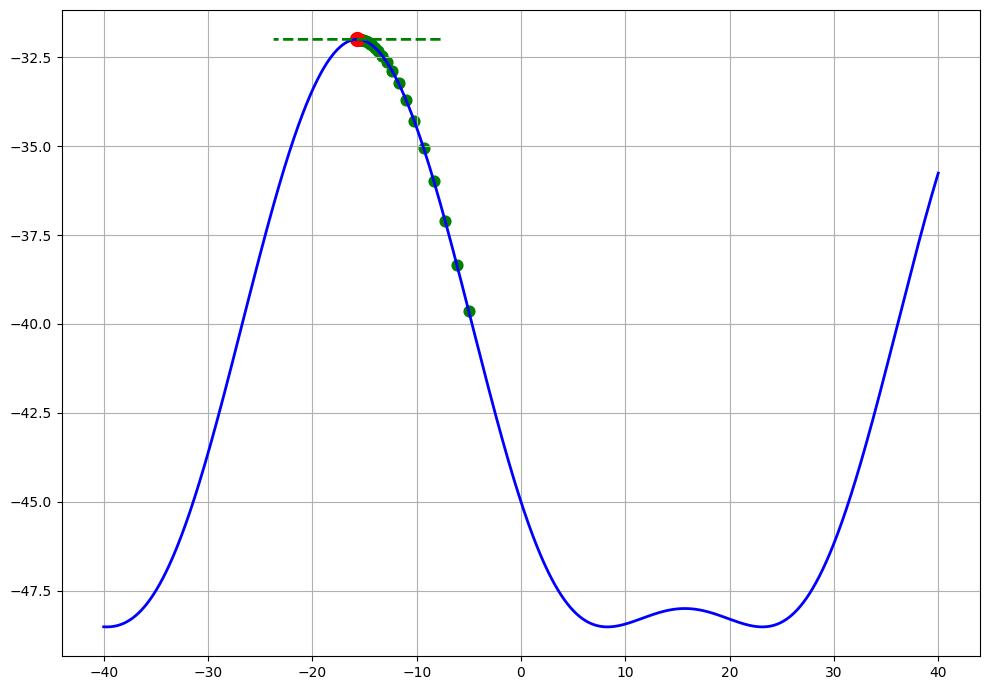

In [8]:
EPSILON=1e-7

def gradient_ascent(x_start):
    # 함수를 완성하시오
    best_x = x_start    # x_start를 그대로 써도 되지만, 좀 더 가독성있도록 변수선언
    history_x = []  # x 기록
    history_y = []  # y 기록
    gradient = 100  # 초기 기울기값
    lr = 1          # learning rate

    while np.abs(gradient) > EPSILON:
        history_x.append(best_x)
        history_y.append(tire_performance(best_x))
        gradient = derivative(tire_performance, best_x)
        best_x = best_x + lr * gradient # gradient ascent : +

    return best_x, history_x, history_y


x_start = -5 # 수정 x

best_x, history_x, history_y = gradient_ascent(x_start)
print('[best_x] : ', best_x)
print('[best_performance] : ', tire_performance(best_x))

show_derivate(tire_performance, best_x, (-40, 40), history_x, history_y)

## 고찰

이번 과제를 통해 미분을 직접 코딩해보았다. 일일히 도함수를 구해가며 코딩하는 것이 아닌, 함수 선언한 것을 바탕으로 도함수의 정의, delta x가 한없이 0에 가까워질 때의 변화량, 즉 y 변화량을 x 변화량으로 나누어 구했다. 원함수만 알면 이렇게 코딩하는 것이 가장 간단한 것 같다.

과제 1
 - 주어진 함수에 대해 도함수의 정의를 적용해 나타나는 그래프를 그렸다.
 - 큰 어려움 없이 해결했다.

과제 2
 - 특정 점에서의 미분값은 도함수의 정의를 잘 구현하면 쉽게 구할 수 있다.
 - 특정 점의 접선의 그래프는 점이 지나는 좌표 한개와 기울기를 알면 구할 수 있다.

과제 3
 - 수업시간에 배운 gradient ascent, descent 방법을 사용해 타어이어 최적 성능을 구했다.
 - 먼저 함수를 구현한다음, 실습 1, 2에서 했던대로 derivate를 함수로 미분함수를 구했다.
 - 경사 상승법, ascent를 통해 최고성능을 찾았고, 이를 가시화했다.

심화 문제
 - 경사하강법을 통해 최고점을 찾아가는 과정을 가시화했다.
 - learning rate를 0.1, 0.01일 등 너무 낮추면 찾아가는 과정이 너무 촘촘해 점들이 하나의 선으로 보이게 된다.
 - 따라서 learning rate를 1로 설정해 가시화했다. 